# <center> Lending Club Classification - Keras </center>

### What are feed-forward neural networks?

*Neural Networks are made of these basic elements known as **Neurons** which work excatly like a brain does. A Neural Network is made up of multiple neurons combined together. They get data either from the source or from other neurons.*
*Neural Networks can be divided in 2 basic types:*
1. *Single Layer Perceptron: These Neural Networks have one input, one hidden and one output layer.*
2. *Multi Layer Percepton: These Neural Networks have multiple input layers.*
> *Want to know more about Neural Networks: <a> https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7 </a> *

![NN](https://www.researchgate.net/profile/Ramon_Quiza/publication/234055177/figure/fig1/AS:300092981563410@1448559150651/Sample-of-a-feed-forward-neural-network.png)

In [2]:
import pandas as pd
import os
import pandas_ml

In [19]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

*Reading the cleaned csv file.*

In [4]:
current_path=os.getcwd()

In [5]:
os.chdir(current_path+"//Lending Club")

In [6]:
df_new=pd.read_csv("Cleaned_Loan_Data.csv",index_col=False)

*We try and use a **Neural Network** for this problem and the library we use to make this work is **Keras**. *


**installing keras**
>**For installing Keras, we first need Tensorflow.**


**Tensorflow**
>**pip install tensorflow**
>**Tensor flow needs to be installed on an environment**

**Creating an environment in Tensorflow:**
>**conda create -n tensorflow pip python=3.5 **
>**activate tensorflow**
>### *pip install keras*
><a> https://www.tensorflow.org/install/install_windows </a>

*We import the files from Keras which uses a Tensorflow backgroud.*

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [9]:
df_new["loan_status"]=df_new['loan_status'].map({'Default': 0, 'Fully Paid': 1})

In [10]:
cols=['tot_cur_bal',
      'loan_amnt',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'revol_util',
 'open_acc',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_accts',
 'inq_last_12m',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc',
 'dti']

In [12]:
x=df_new[cols]
y=df_new['loan_status']

*Normalizing the data using **sklearn.preprocessing**.*Transforms features by scaling each feature to a given range.

*This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.*
<a> http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html </a>

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(np_scaled,columns=x.columns)

*Doing a **80-20** split on the dataset.*

In [14]:
x_train,x_test,y_train,y_test=train_test_split(df_normalized,y,train_size=0.80,random_state=1)

In [15]:
x_train.shape

(54484, 13)

In [112]:
def plotAUC(truth, pred):
    plt.figure(figsize=(7,5))
    sb.set_style("darkgrid")
    fpr, tpr, _ = roc_curve(truth,pred)
    roc_auc = roc_auc_score(truth,pred)
    plt.plot(fpr, tpr, color= "Blue",lw=2,marker="h", label= '(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color="#3498DB", lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

## Model 1 for Binary Classification using Keras

*Sequential model is a stack of layers.New layers can be simply added using the **.add** method.*

<a>https://keras.io/getting-started/sequential-model-guide/</a>

**Hyperparameters in Neural Networks.:**
1. *Activation Function: tanh,sigmoid, reLu*
2. *Kernel Initialization: random normal, glorot-uniform, 1s, 0s, None*
3. *Adding a regularization layer- Dropout*
4. *Optimizer- adam, adamax, SGD*
5. *Epochs- number of iterations*
6. *Batch-size- number of rows being trained at one time*
7. *Loss- binary-crossentropy, categorical-crossentropy, sparse-categoricalcrossentropy*


*Note- I have just mentioned some parameters that are in the scope of this code.*

**Binary Classification using Feed Forward Neural Network - Keras **

*Keras works by having mutiple layers, activation functions and loss- which in this case is binary-crossentropy because as we mentioned it is a binary classification problem (either it will be fully paid or not).*

In [92]:
model=Sequential()
model.add(Dense(20, input_dim=13,activation='relu'))
model.add(Dense(1,activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

*Model runs for 10 iterations*

In [93]:
m1=model.fit(x_train, y_train, epochs=10, batch_size=50,validation_data=(x_test, y_test))

Train on 54484 samples, validate on 13621 samples
Epoch 1/10
54484/54484 [==============================] - 3s 62us/step - loss: 0.7279 - acc: 0.6485 - val_loss: 0.5978 - val_acc: 0.6968
Epoch 2/10
54484/54484 [==============================] - 3s 54us/step - loss: 0.5913 - acc: 0.6984 - val_loss: 0.5877 - val_acc: 0.6986
Epoch 3/10
54484/54484 [==============================] - 3s 53us/step - loss: 0.5851 - acc: 0.6992 - val_loss: 0.5848 - val_acc: 0.6989
Epoch 4/10
54484/54484 [==============================] - 3s 53us/step - loss: 0.5829 - acc: 0.6992 - val_loss: 0.5831 - val_acc: 0.6997
Epoch 5/10
54484/54484 [==============================] - 3s 52us/step - loss: 0.5815 - acc: 0.6998 - val_loss: 0.5813 - val_acc: 0.7003
Epoch 6/10
54484/54484 [==============================] - 3s 51us/step - loss: 0.5808 - acc: 0.7002 - val_loss: 0.5809 - val_acc: 0.6989
Epoch 7/10
54484/54484 [==============================] - 3s 54us/step - loss: 0.5801 - acc: 0.6995 - val_loss: 0.5815 - val_acc

**We can see that we get an accuracy of around 70% in our validation dataset which is pretty good.**

**Keras model can be saved and used later.They also have an interesting feature called *history* which can be used to get accuracy and loss of the model and the train and validation set *over every iteration*.**

*Graph showing an accuracy comparison between train and validation data set.*

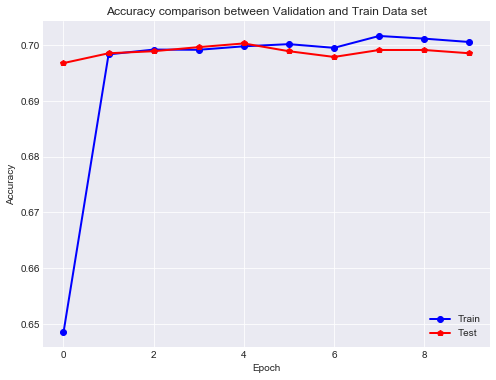

In [94]:
plt.figure(figsize=(8,6))
plt.plot(m1.history['acc'],lw=2,color="Blue",marker='o')
plt.plot(m1.history['val_acc'],lw=2,color="Red",marker='p')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

*Comparison between Loss of Train and Test Data Set*

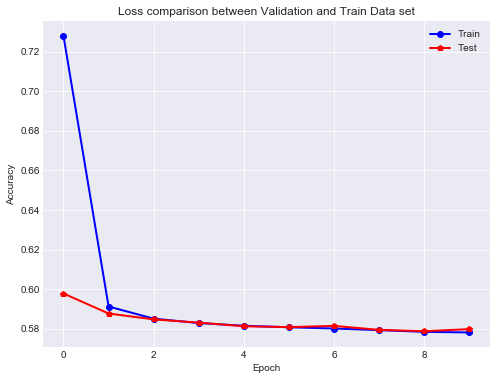

In [95]:
plt.figure(figsize=(8,6))
plt.plot(m1.history['loss'],lw=2,color="Blue",marker='o')
plt.plot(m1.history['val_loss'],lw=2,color="Red",marker='p')
plt.title('Loss comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

**model.summary()** *function in Keras gives us a detailed structure of the input and ouput layers of the model.*

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


*Checking the configuration of the model.This model can be reinstantiated using the **model.from_config()** command.*

In [97]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 13),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_24',
   'trainable': True,
   'units': 20,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'tanh',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_r

In [99]:
model.evaluate(x_test, y_test,batch_size=50)

13621/13621 [==============================] - 0s 21us/step


[0.5798349599640115, 0.6985537080886947]

*Predicting values using the model. In this case like XGBoost we get probabilities and we divide them the same way.*
* *Probability with a value of less than 0.5 will default.*
* *Probability with a value greater than 0.5 will not default.*

In [26]:
keras_pred1=model.predict(np.array(x_test))
keras_pred1[keras_pred1<=0.5]=0
keras_pred1[keras_pred1>0.5]=1

*Using confusion matrix from **sklearn.metrics** and **pandas_ml** to evaluate the model.*

In [28]:
from pandas_ml import ConfusionMatrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [100]:
pred=pd.DataFrame(keras_pred1)
pred.rename(columns={0: 'Predicted'},inplace=True)

In [101]:
np.array(pred["Predicted"])

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [110]:
nn_conf=pd.DataFrame(confusion_matrix(pred["Predicted"],y_test))
print(nn_conf)
print("Loans missclassified as Fully Paid when they should have actually defaulted",nn_conf[0][1])
print("Percent of loans missclassified",(float(nn_conf[0][1])/float(x_test.shape[0]))*100)

      0     1
0   310   268
1  3842  9201
Loans missclassified as Fully Paid when they should have actually defaulted 3842
Percent of loans missclassified 28.206445929080097


In [103]:
print("Accuracy of the model is :",((np.array(pred["Predicted"])==y_test).mean())*100)

Accuracy of the model is : 69.82600396446664


*We compare the accuracy of the model which is 69% and it misclassified 28% loans as Fully Paid when they should have been default.*

Predicted  False   True  __all__
Actual                          
False        310   3842     4152
True         268   9201     9469
__all__      578  13043    13621
population: 13621
P: 9469
N: 4152
PositiveTest: 13043
NegativeTest: 578
TP: 9201
TN: 310
FP: 3842
FN: 268
TPR: 0.9716971169078044
TNR: 0.07466281310211946
PPV: 0.7054358659817527
NPV: 0.5363321799307958
FPR: 0.9253371868978806
FDR: 0.2945641340182473
FNR: 0.028302883092195585
ACC: 0.6982600396446663
F1_score: 0.8174307036247335
MCC: 0.10586949365677446
informedness: 0.04635993000992378
markedness: 0.2417680459125484
prevalence: 0.6951765655972395
LRP: 1.0501005802710055
LRN: 0.37907603418966473
DOR: 2.770158188754302
FOR: 0.46366782006920415
None


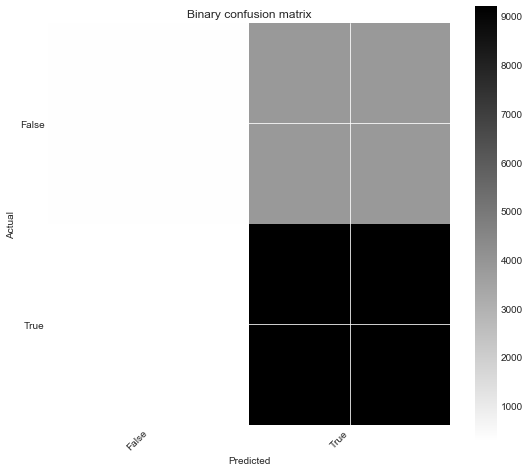

In [104]:
cm=ConfusionMatrix(np.array(y_test),np.array(pred["Predicted"]))
print(cm)
print(cm.print_stats())
cm.plot()

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

*Area Under the curve for the Feed Forward Neural Net is **62%**.*

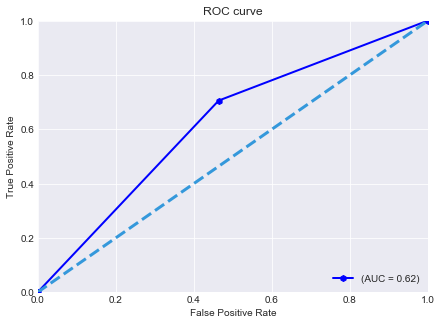

In [113]:
plotAUC(pred["Predicted"],y_test)

## Model 2- Feedforward Multi Layer Perceptron

In [115]:
import keras

*We use the **Adam** optimizer with a learning rate of 0.0001 which is considerably low and to compensate this, we will increase the number of iterations when we fit the mode. Since we have 3 layers in our model and we want to ensure it does not overfit, we  add a **dropout** layer which is basically a regularization layer to avoid over-fitting.*

**<a>https://keras.io/optimizers/</a>**

In [116]:
opt=keras.optimizers.Adam(lr=0.0001)

In [117]:
model2=Sequential()
model2.add(Dense(20,kernel_initializer='random_normal', input_dim=13,activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='tanh',kernel_initializer='random_normal'))
model2.add(Dense(1,activation='tanh'))
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [118]:
m2=model2.fit(x_train, y_train, epochs=25, batch_size=50,validation_data=(x_test, y_test))

Train on 54484 samples, validate on 13621 samples
Epoch 1/25
54484/54484 [==============================] - 4s 68us/step - loss: 2.5487 - acc: 0.3020 - val_loss: 1.7939 - val_acc: 0.3048
Epoch 2/25
54484/54484 [==============================] - 3s 56us/step - loss: 1.4706 - acc: 0.3020 - val_loss: 1.1335 - val_acc: 0.3048
Epoch 3/25
54484/54484 [==============================] - 4s 65us/step - loss: 0.9597 - acc: 0.3328 - val_loss: 0.7605 - val_acc: 0.3535
Epoch 4/25
54484/54484 [==============================] - 3s 58us/step - loss: 0.7420 - acc: 0.5141 - val_loss: 0.6514 - val_acc: 0.6598
Epoch 5/25
54484/54484 [==============================] - 3s 51us/step - loss: 0.6883 - acc: 0.6071 - val_loss: 0.6364 - val_acc: 0.6910
Epoch 6/25
54484/54484 [==============================] - 3s 52us/step - loss: 0.6741 - acc: 0.6335 - val_loss: 0.6328 - val_acc: 0.6932
Epoch 7/25
54484/54484 [==============================] - 3s 49us/step - loss: 0.6625 - acc: 0.6470 - val_loss: 0.6285 - val_acc

*Using the **history** feature of the keras model to get accuracy over every iteration on the train and validation data set.*

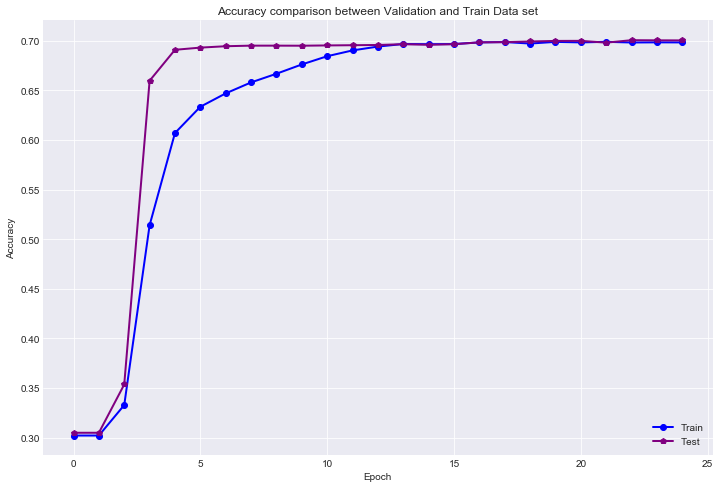

In [121]:
plt.figure(figsize=(12,8))
plt.plot(m2.history['acc'],lw=2,color="Blue",marker='o')
plt.plot(m2.history['val_acc'],lw=2,color="Purple",marker='p')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

*Loss values plotted for train and validation data set*


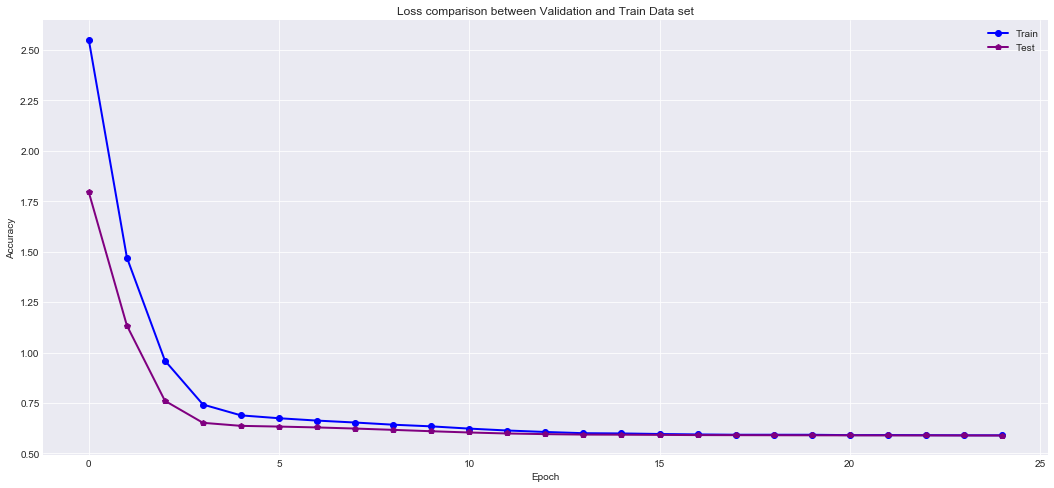

In [124]:
plt.figure(figsize=(18,8))
plt.plot(m2.history['loss'],lw=2,color="Blue",marker='o')
plt.plot(m2.history['val_loss'],lw=2,color="Purple",marker='p')
plt.title('Loss comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [125]:
pred2=model2.predict(np.array(x_test))
pred2[pred2<=0.5]=0
pred2[pred2>0.5]=1

In [126]:
k_pred=pd.DataFrame(pred2)
k_pred.rename(columns={0: 'Predicted'},inplace=True)

*We get an accuracy of **70%**, and we have misclassified around **28%** loans as default when they should have been fully paid, and the area under the curve is **64%**.*

In [139]:
nn_conf2=pd.DataFrame(confusion_matrix(k_pred["Predicted"],y_test))
print(nn_conf2)
print("Loans missclassified as Fully Paid when they should have actually defaulted",nn_conf2[0][1])
print("Percent of loans missclassified",(float(nn_conf2[0][1])/float(x_test.shape[0]))*100,"%")

      0     1
0   273   201
1  3879  9268
Loans missclassified as Fully Paid when they should have actually defaulted 3879
Percent of loans missclassified 28.478085309448648 %


In [138]:
print("The accuracy of this model is",(np.array(k_pred["Predicted"])==y_test).mean()*100,"%")

The accuracy of this model is 70.04625211071141 %


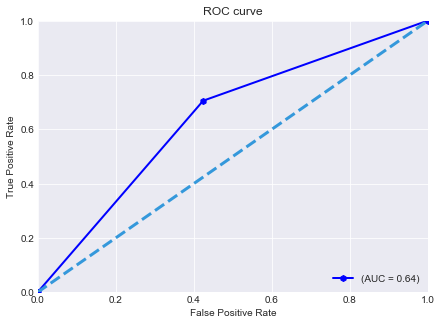

In [128]:
plotAUC(k_pred["Predicted"],y_test)

In [141]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                280       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 8         
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


# Results :

**A comparison of all the models accuracy and the misclassification error(all the loans that were misclassified as Fully Paid when they should be default)**

**The current algorithm right now misclassifies default loan 30% of the time, so our entire aim was to find a algorithm that does a better job than the current machine.**

Model | Accuracy  | Missclassified Loans Percentage
------- | -------------|--------------
Decision Tree| 60% | 19%
Random Forest | 66% | 20.85%
Random Forest RandomizedSearchCV| 70% | 29%
Random Forest GridSearchCV|  70.14 % | 28.58%
XgBoost| 69.79% | 24.19%
Neural Network with 1 layer | 69%| 28%
Neural Network with multiple layers | 70.04% |28.47%

**The highest accuracy we get is 70.14% from Random Forest GridSearchCV which can not be our ideal model for multiple reasons.**
1. *It has a higher misclassification rate, thought it might be a difference of some decimal points but when there are say 10,000 people, just 1% accounts for 100 people(not to forget the amount of money you lose when you give out loans to that many people).*
2. *GridSearchCV on Random forest takes longer than any algorith mentioned(MLP is faster than this).*

**Our second option is MLP with multiple layers which gives us an accuracy of 70.04% and misclassifies 28.47% people in the wrong category, 28.47% is better than 30% which means that this algorithm does a better job than the current algorithm.**

**This is the reason we decide to go with FeedForward Neural Network(MLP multiple layers) as the final model we use because of the high accuracy and less misclassification error.**